[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/adams/blob/master/exercises/Ex12_CNN_manual/Ex12_manual_cnn.ipynb) 


Convolutional Neural Networks

## Convolutional layers for image processing 

Time series data has one dimension (earlier<>later), but image data is a good example of data that has two dimensions (left<>right, up<>down). 

In [2]:
import tensorflow.keras as tf
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# ready made datasets to play in Keras, load the data
fashion_mnist = tf.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Let's understand the data, which is now 3D because we have $N$ observations!

In [4]:
train_images.shape
#tiny images, 28*28

(60000, 28, 28)

In [5]:
train_labels.shape


(60000,)

In [6]:
train_labels[0]

9

In [ ]:
#10 different classes
np.max(train_labels)

9

Image data (like multivariate time series data) is multidimensional. Each observation here is a square greyscale image with 28 pixels on the horizontal and vertical.  

In [7]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
#grey scale images that encode the intensity
train_images[0][:20,:10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228

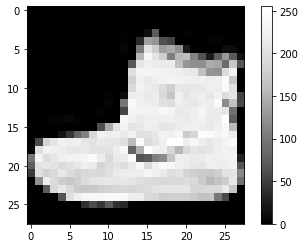

In [ ]:
plt.figure()
plt.imshow(train_images[0], cmap="Greys_r", vmin = 0, vmax = 255)
plt.colorbar()
plt.grid(False)
plt.show()
#ankle boot for class 9

We have labels on the type of product, e.g. `9` ankle boot

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

##  Convolutional layers in keras

Now to apply our convolutions on a much larger scale! Here is an article illustrating when to use [2D vs 3D Convolutions](https://towardsdatascience.com/2d-or-3d-a-simple-comparison-of-convolutional-neural-networks-for-automatic-segmentation-of-625308f52aa7#:~:text=2D%20CNNs%20use%202D%20convolutional,map%20for%20a%20single%20slice.&text=2D%20CNNs%20predict%20segmentation%20maps,volumetric%20patch%20of%20a%20scan)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [ ]:
#create model
model = Sequential()
#add model layers
nb_filters_first_cnn = 10
nb_filters_second_cnn = 10
nb_out_layer_neurons = 10 # defined by number of classes in classification task 
filter_size = 3
#10 filters ,each filter has size 3, if kernel size specified that way, 3 is interpretat as 3*3
model.add(Conv2D(nb_filters_first_cnn, kernel_size=filter_size, activation="relu", input_shape=(28,28,1)))
# kernel size: specifying the height and width of the 2D convolution filter. 
#Can be a single integer to specify the same value for all spatial dimensions

model.add(Conv2D(nb_filters_second_cnn, kernel_size=filter_size, activation="relu"))
# 3d datastructure from output of prev conv layer, will flatten into 1dim vector
model.add(Flatten())
model.add(Dense(nb_out_layer_neurons, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 10)        100       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 10)        910       
                                                                 
 flatten_1 (Flatten)         (None, 5760)              0         
                                                                 
 dense (Dense)               (None, 10)                57610     
                                                                 
Total params: 58,620
Trainable params: 58,620
Non-trainable params: 0
_________________________________________________________________


Make sure you understand the dimensionality at each stage of the model:

1. Dimension of the input image (28,28,1) -> What is the 3rd dimension?
2. Dimension of the second convolutional layer -> Why 24x24? Why 10 on the third axis?
3. Why does the second convolutional layer have much more parameters than the first?
4. Why the large number of parameters in the Dense layer?

For convolutional layers, we can calculate the number of parameters as `(input_channels * filter_size* filter_size + 1)* output_channels`.

In [ ]:
(1  * (filter_size*filter_size) + 1) * nb_filters_first_cnn
#first 1 replaced with 3 in case of coloured image with 3 channels/depth =3

100

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
#filter covers full depth dimension of the input tensor! 
#first CONV LAyer gets as DATA the image, shape of image was 30*30*1, 
#we have a single colour channel in image bcs its grey scale
#if it would be a colour image, we d have 3 colour channels, each would have values 0-255
#filters cover full depth of input tensor
#depth dimension of input image is 1 for first COnv LAyer. So the first COnv Layer gets 28*28*1
#in 2nd Conv Layer, we used 10 filters in first COnv Layer, depth of output of 1st Conv Layer is 10 = nb of filters
# here we have (3*3+1) *10
(nb_filters_first_cnn * (filter_size*filter_size) + 1) * nb_filters_second_cnn

910

When moving from a convolutional layer to a dense layer, we flatten the output of the former to comply with the specification of the input to a dense layer. That is the purpose of the *Flatten layer* in the above ConvNet. We can calculate the output dimension of the flatten layer as the product along all axes of the input tensor. In our case:

In [ ]:
flatten_layer_output = 24*24*nb_filters_second_cnn
flatten_layer_output

5760

For the dense layer, which is also the output layer of our ConvNet, we obtain the number of parameters in the usual way as `(nb_inputs + 1)*nb_outputs`:

In [ ]:
nb_out_layer_neurons*(flatten_layer_output+1)
#nb of units *(dim of inputs +1)

57610

#### Max-Pooling  

https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks

pooling layer operates upon each feature map separately to create a new set of the same number of pooled feature maps.  Two common functions used in the pooling operation are:

Average Pooling: Calculate the average value for each patch on the feature map.

Maximum Pooling (or Max Pooling): Calculate the maximum value for each patch of the feature map.

In [ ]:
#create model
model = Sequential()

# Add padding to keep the dimensionality of the 'hidden image' constant
model.add(Conv2D(10, kernel_size=3, activation="relu", input_shape=(28,28,1), padding="same", name="conv1"))
# kernel size: specifying the height and width of the 2D convolution filter. 
#Can be a single integer to specify the same value for all spatial dimensions

# Add a max-pooling layer to reduce the size of the image over which we convolute, define pool size. 2*2 is default, means dimension of input tensor is halfed!!!
# no trainable parameters in POOLING LAYER
model.add(MaxPooling2D(pool_size=(2,2)))
# 2x2 pooling window, If only one integer is specified, the same window length will be used for both dimensions

#pool_size: integer or tuple of 2 integers, window size over which to take the maximum. (2, 2) will take the max value over a 2x2 pooling window. If only one integer is specified, the same window length will be used for both dimensions.
#strides: Integer, tuple of 2 integers, or None. 
#Strides values. Specifies how far the pooling window moves for each pooling step. 
#If None, it will default to pool_size.#

model.add(Conv2D(10, kernel_size=3, activation="relu", padding="same", name="conv2"))

model.add(Flatten())
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 10)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 14, 14, 10)        910       
_________________________________________________________________
flatten_2 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                19610     
Total params: 20,620
Trainable params: 20,620
Non-trainable params: 0
_________________________________________________________________


#### 1x1 Convolution

A 1x1 is often used to reduce the number of depth channels, since it is often very slow to multiply volumes with extremely large depths.

In [ ]:
#create model
model = Sequential()

# Add padding to keep the dimensionality of the 'hidden image' constant
#specify shape of input, with padding = same we ensure that image does not shrink, we want to have full control over size
# pool size, specified
model.add(Conv2D(10, kernel_size=3, activation="relu", input_shape=(28,28,1), padding="same", name="conv1"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(10, kernel_size=3, activation="relu", padding="same", name="conv2"))

# Add a 1x1 convolution to reduce the dimensionality of the Dense layer
# by reducing the 'depth' of the hidden image
# add conv layer with filter size is 1 and nb of filters is 1, ie. single weight
# every filter goes over teh whole depth of input data!, ie 10 
#here 1*1 conv is averaging over depth dimension of 10!! We are integrating over depth DImension
model.add(Conv2D(1, kernel_size=1, activation="relu", padding="same"))

model.add(Flatten())
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 14, 14, 10)        910       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 1)         11        
_________________________________________________________________
flatten_4 (Flatten)          (None, 196)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1970      
Total params: 2,991
Trainable params: 2,991
Non-trainable params: 0
____________________________________________________

Thanks to 1*1 conv layer we get rid of depth dimension in our dense layer, therefore weight matrix is a lot smaller, need a lot fewer weights that can make training a lot easier. Note that the pooling layer has no trainable parameters.

#### Model Training

Finally, let's train the model

In [ ]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_images.shape


(60000, 28, 28)

In [8]:
# Reshape the images to comply with tensorflow format (height x width x channel)
train_images, test_images = train_images.reshape(train_images.shape[0],28,28,1), test_images.reshape(test_images.shape[0],28,28,1)

In [9]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
test_images.shape

(10000, 28, 28, 1)

Preprocessing for image data is easier/standardized, because we know the technical minimum and maximum values that pixels can take.

In [ ]:
train_images[0]

In [ ]:
np.max(train_images)

255

In [ ]:
#we scale data, scalung is trivial by 255, cause this is how images are stored
train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

In [ ]:
from keras.utils import np_utils

In [ ]:
# one-hot encode the training and testing labels
train_labels = np_utils.to_categorical(train_labels, 10)
test_labels = np_utils.to_categorical(test_labels, 10)

In [ ]:
test_labels.shape

(10000, 10)

In [ ]:

test_images.shape

(10000, 28, 28, 1)

In [ ]:
print(f'Loss and accuracy:\n {model.evaluate(test_images, test_labels)}')

313/313 [==============================] - 3s 8ms/step - loss: 2.3250 - accuracy: 0.0260
Loss and accuracy:
 [2.3269565105438232, 0.025800000876188278]


In [ ]:
story = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), 
                  epochs=1, batch_size=128)

469/469 [==============================] - 25s 53ms/step - loss: 0.8656 - accuracy: 0.6819 - val_loss: 0.6154 - val_accuracy: 0.7717


In [ ]:
print(f'Loss and accuracy:\n {model.evaluate(test_images, test_labels)}')
#evaluate on test set randomly initialized COnvNet, 82perc class accuracy from this 10 class problem, prety good

10000/10000 [==============================] - 1s 64us/step
Loss and accuracy:
 [0.5059407576322555, 0.8210999965667725]


## Further Reading: Pretrained Image Networks

Check out https://keras.io/applications/  -> Documentation for individual models

And Check out [Image Data Generators](https://towardsdatascience.com/keras-data-generators-and-how-to-use-them-b69129ed779c).

[**Transferlearning**](https://towardsdatascience.com/keras-transfer-learning-for-beginners-6c9b8b7143e)


 Though training a CNN from scratch is possible for small projects, most applications require the training of very large CNN’s and this as you guessed, takes extremely huge amounts of processed data and computational power. And both of these are not found so easily these days.
That’s where transfer learning comes into play. In transfer learning, we take the pre-trained weights of an already trained model(one that has been trained on millions of images belonging to 1000’s of classes, on several high power GPU’s for several days) and use these already learned features to predict new classes.
The advantages of transfer learning are that:

1: There is no need of an extremely large training dataset.

2: Not much computational power is required. As we are using pre-trained weights and only have to learn the weights of the last few layers.
There are several models that have been trained on the image net dataset and have been open sourced.
For example, VGG-16, VGG-19, Inception-V3 etc. For more details about each of these models, read the official keras documentation here.
 - 

NOTE: Doesn't really work with fashion MNIST, since the images are too small (28x28) for state-of-the-art models trained on imagenet (starts at 128x128). ImageNet is an image database organized according to the WordNet hierarchy (currently only the nouns), in which each node of the hierarchy is depicted by hundreds and thousands of images. The project has been instrumental in advancing computer vision and deep learning research.